# Evaluation Project 1 - Baseball Case Study

## Importing necessary libraries

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
import joblib

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [81]:
df = pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [82]:
df.shape

(30, 17)

## Dataframe description

Problem Statement: This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

**Features:**
1. Runs (R):number of times a player crosses home plate
2. At Bats (AB): plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
3. Hits (H): reaching base because of a batted, fair ball without error by the defense
4. Doubles (2B): hits on which the batter reaches second base safely without the contribution of a fielding error
5. Triples (3B): hits on which the batter reaches third base safely without the contribution of a fielding error
6. Homeruns (HR): hits on which the batter successfully touched all four bases, without the contribution of a fielding error
7. Walks (BB): hitter not swinging at four pitches called out of the strike zone and awarded first base
8. Strikeouts (SO): number of batters who received strike three
9. Stolen Bases (SB): number of bases advanced by the runner while the ball is in the possession of the defense
10. Runs Allowed (RA): number of runs allowed times nine divided by innings pitched
11. Earned Runs (ER): number of runs that did not occur as a result of errors or passed balls
12. Earned Run Average (ERA):  total number of earned runs, multiplied by 9, divided by innings pitched
13. Shutouts (SHO): number of complete games pitched with no runs allowed
14. Saves (SV): number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
15. Complete Games (CG): number of games where player was the only pitcher for their team
16. Errors (E): number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

**Target/Label:** Number of predicted wins (W)

**Finding:** All columns (features and target) appear to have continuous data. Also, since the target in the model will help us predict the number of wins, the study will be treated as a regression problem.

## EDA

In [83]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

**Finding:** No null values in the dataset

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [85]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [86]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

<AxesSubplot:xlabel='W', ylabel='Density'>

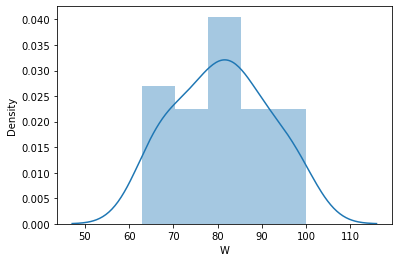

In [87]:
sns.distplot(df.W)

## Relationship between dependent and independent variables

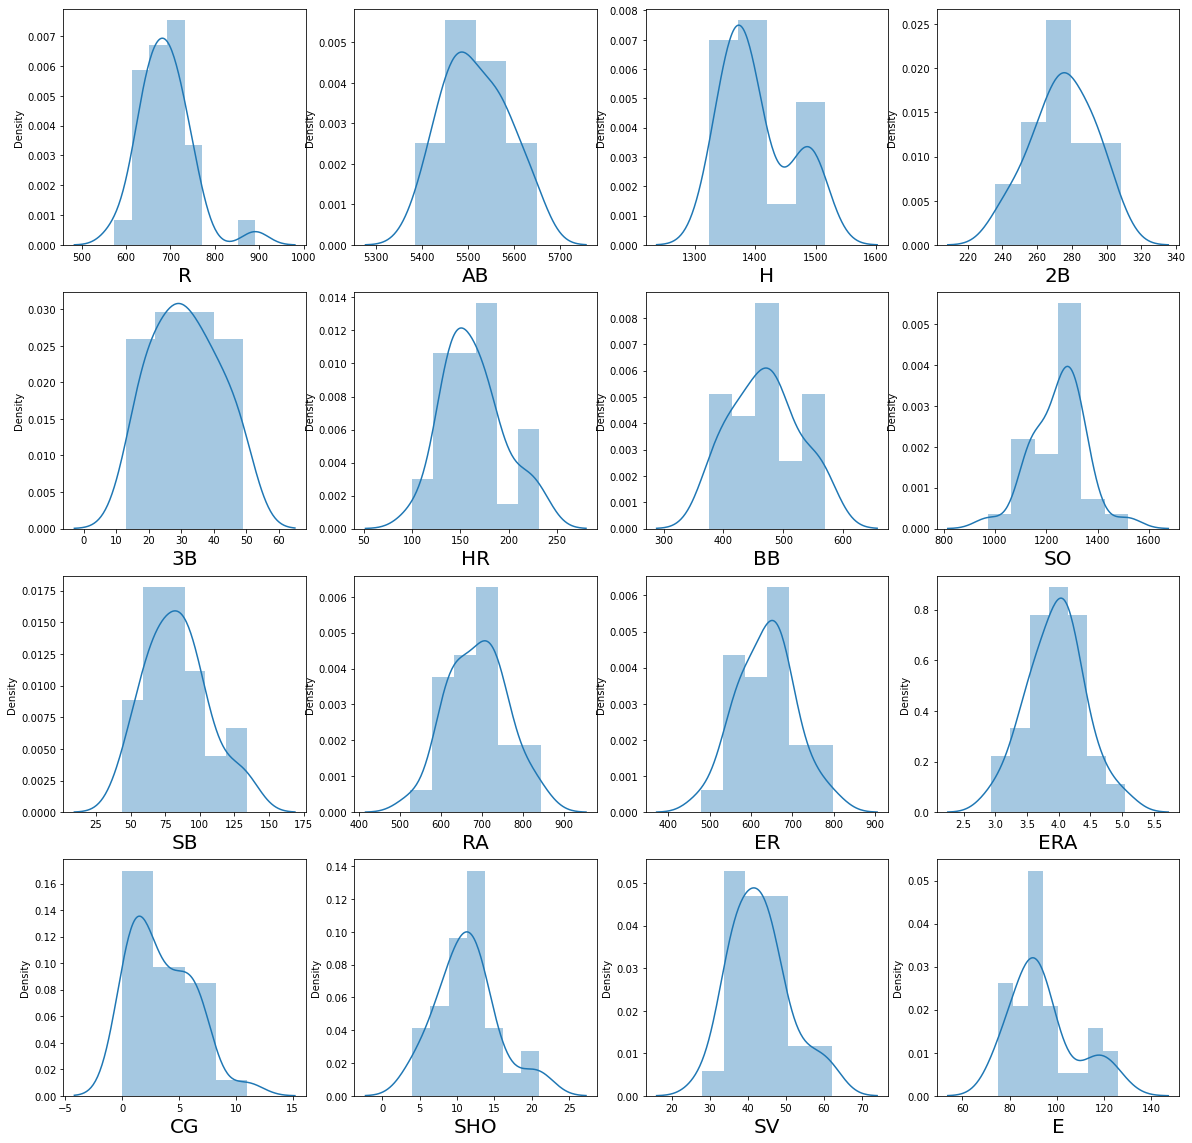

In [88]:
plt.figure(figsize=(20,20))
plotnum=1
for col in df.drop(columns=['W']):
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [89]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

**Findings:**
1. Data is normally distributed across most features.
2. Skewness is observed in some columns like R, H, CG, SV and E, with minor skewness in few others.

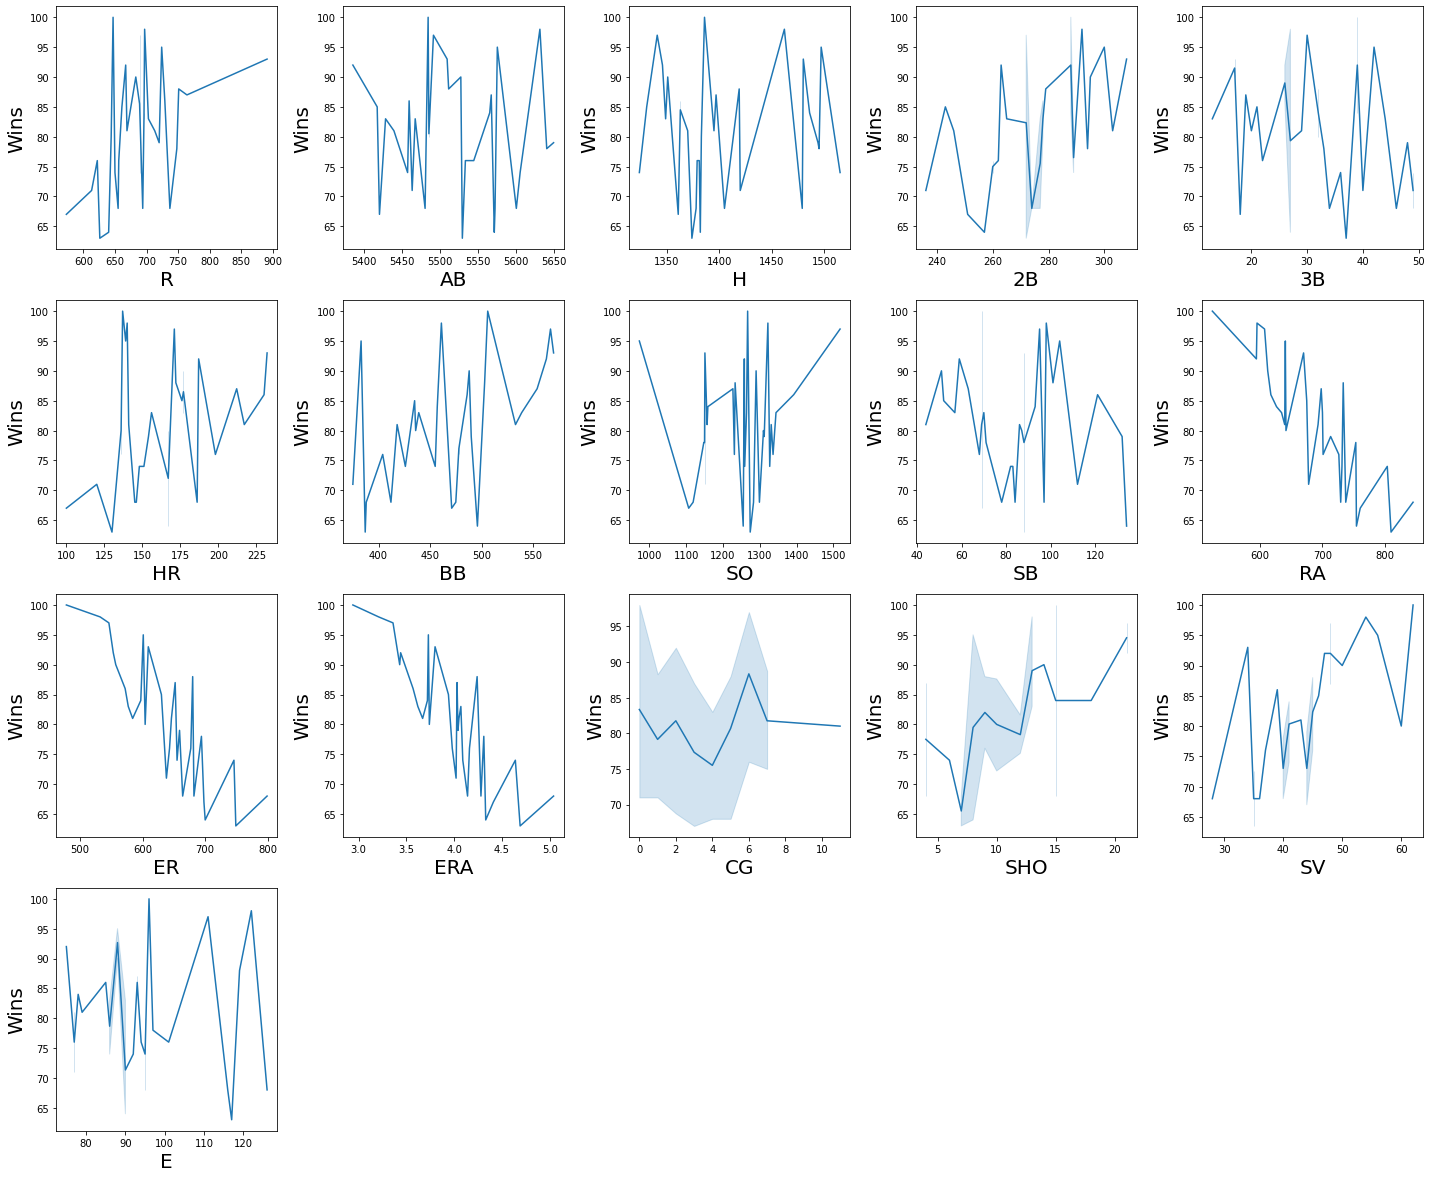

In [90]:
plt.figure(figsize=(20,20))
plotnum=1
X  = df.drop(columns=['W'])
y = df['W']
for col in X:
    if plotnum<=16:
        plt.subplot(5,5,plotnum)
        sns.lineplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Wins',fontsize=20)
    plotnum+=1
plt.tight_layout()

**Findings:** All features have someewhat to clear positive linear relationship with W, except in the case of RA, ER and ERA, that have clearly negative linear relationship with W.

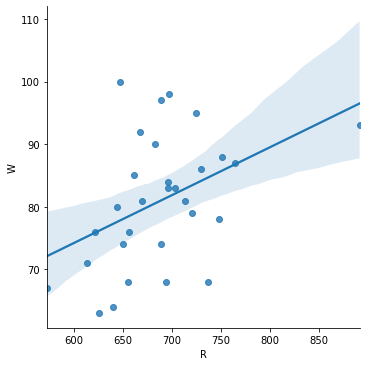

In [91]:
sns.lmplot(x="R", y="W", data=df)

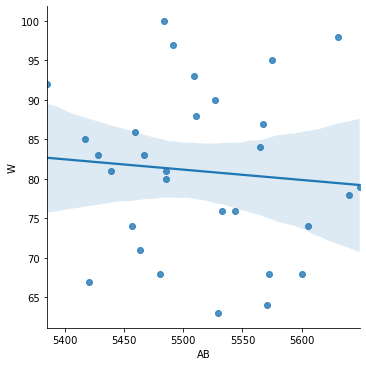

In [92]:
sns.lmplot(x="AB", y="W", data=df)

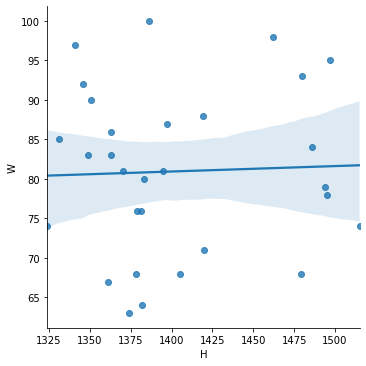

In [93]:
sns.lmplot(x="H", y="W", data=df)

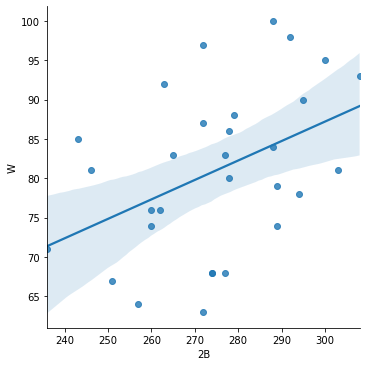

In [94]:
sns.lmplot(x="2B", y="W", data=df)

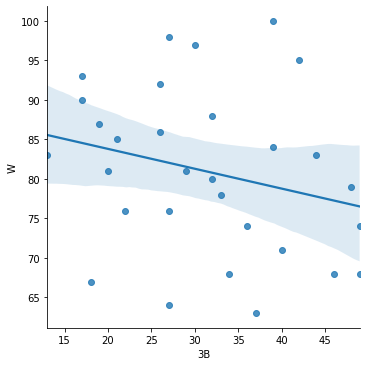

In [95]:
sns.lmplot(x="3B", y="W", data=df)

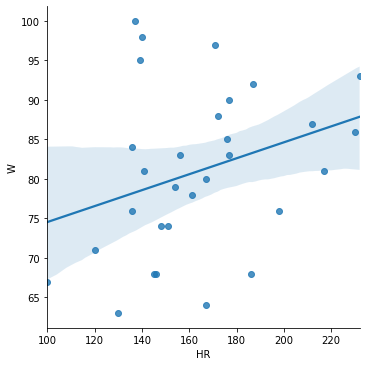

In [96]:
sns.lmplot(x="HR", y="W", data=df)

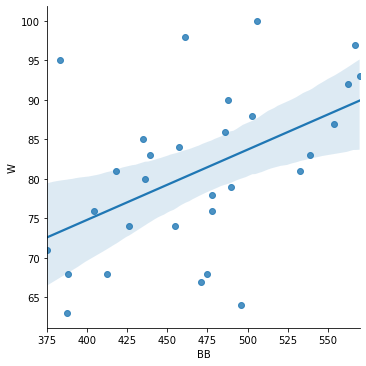

In [97]:
sns.lmplot(x="BB", y="W", data=df)

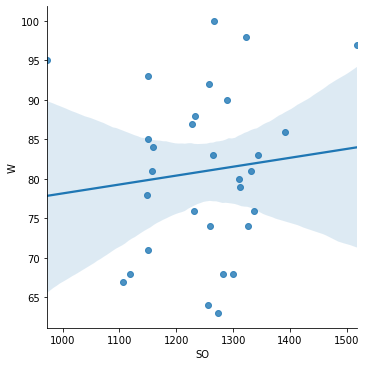

In [98]:
sns.lmplot(x="SO", y="W", data=df)

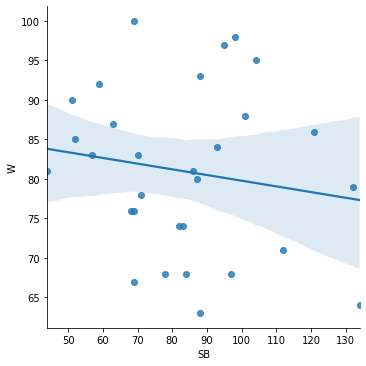

In [99]:
sns.lmplot(x="SB", y="W", data=df)

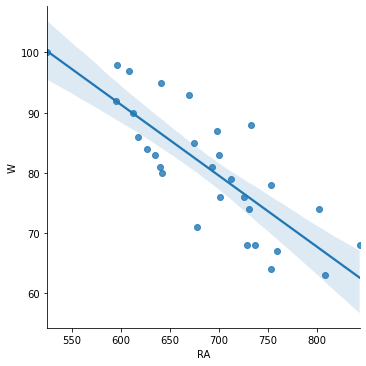

In [100]:
sns.lmplot(x="RA", y="W", data=df)

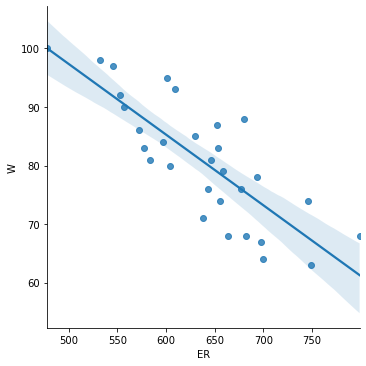

In [101]:
sns.lmplot(x="ER", y="W", data=df)

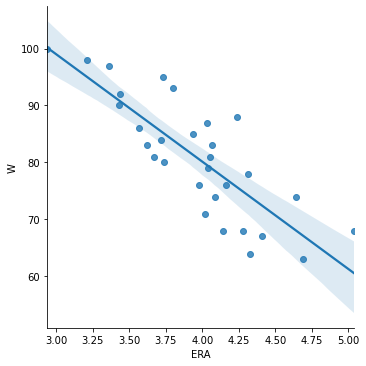

In [102]:
sns.lmplot(x="ERA", y="W", data=df)

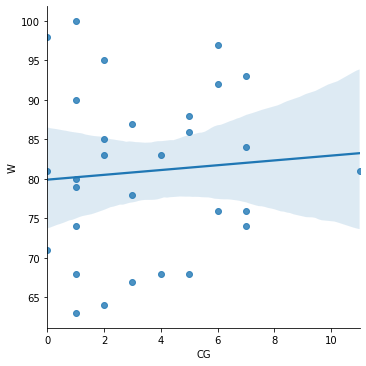

In [103]:
sns.lmplot(x="CG", y="W", data=df)

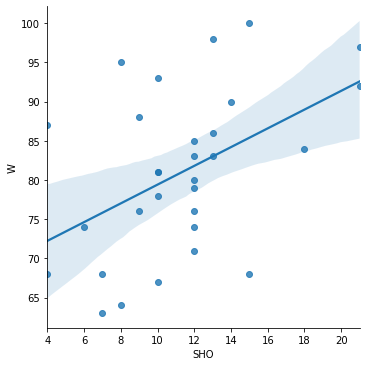

In [104]:
sns.lmplot(x="SHO", y="W", data=df)

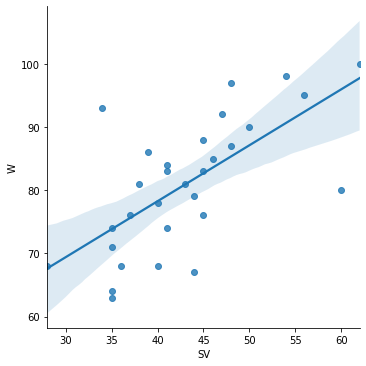

In [105]:
sns.lmplot(x="SV", y="W", data=df)

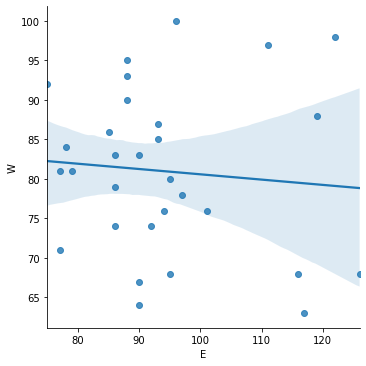

In [106]:
sns.lmplot(x="E", y="W", data=df)

## Outliers Check

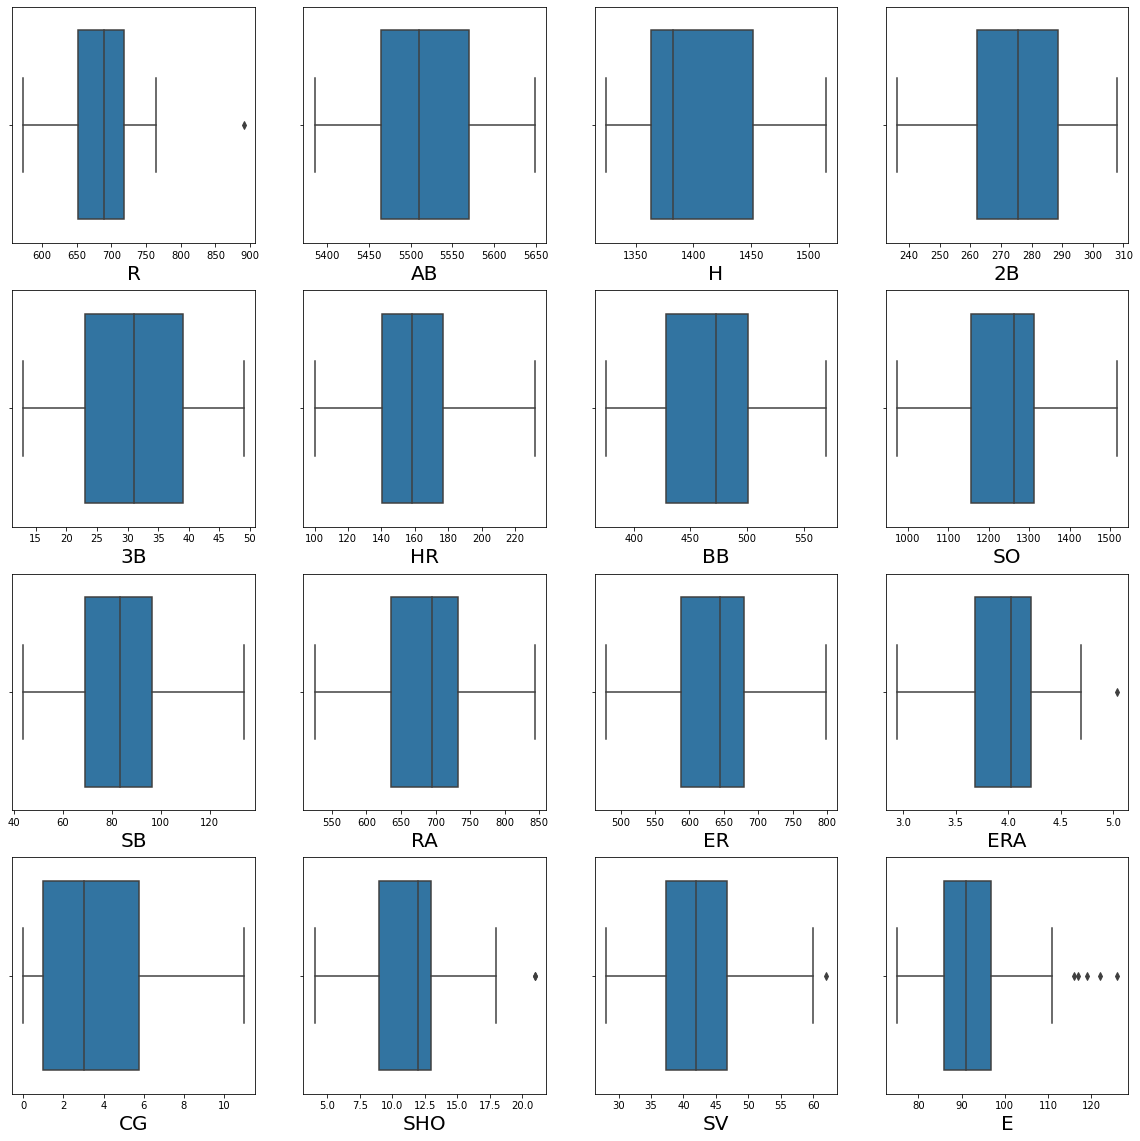

In [107]:
plt.figure(figsize=(20,20))
plotnum=1
for col in df.drop(columns = ['W'],axis=1):
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

**Findings:**<br>
1. Columns R, ERA, SHO, SV and E shows presence of outliers. However, since the size of the dataset is very small, removal of outliers may affect the prediction outcomes to an extent.
2. Also, maximum number of outliers are present in E (errors), and considering the maximum value of 126 in the column, that does not appear to be an unreasonable number of errors for a team to commit in an entire season of the game. 

In [108]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [109]:
df_corr = df.corr()
df_corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


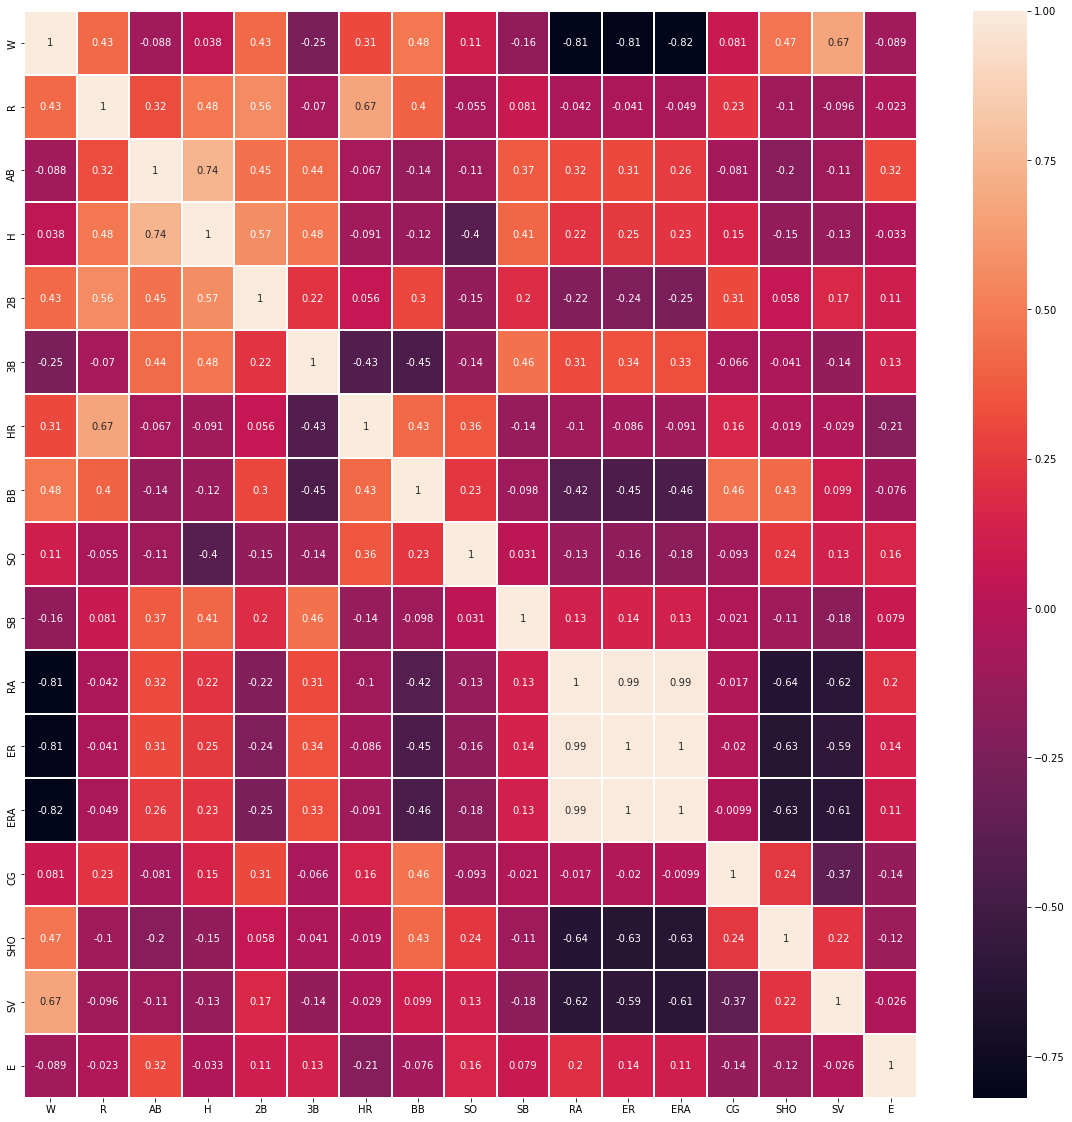

In [110]:
plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot=True,linewidth=1)
plt.show()

**Findings:**
1. There is very high correlation of W with ER, ERA and RA, and since ERA = (ER x 9)/no. of innings, ER may not be relevant for prediction and may need to be dropped. However, the information pertaining to No. of innings is not available, so ERA and ER may have distinct levels of correlation with W. 

2. Also, RA, ER and ERA have extremely high correlation with each other, which may also lead to decision on dropping the columns, if needed.

## Establishing correlation of features with target/label

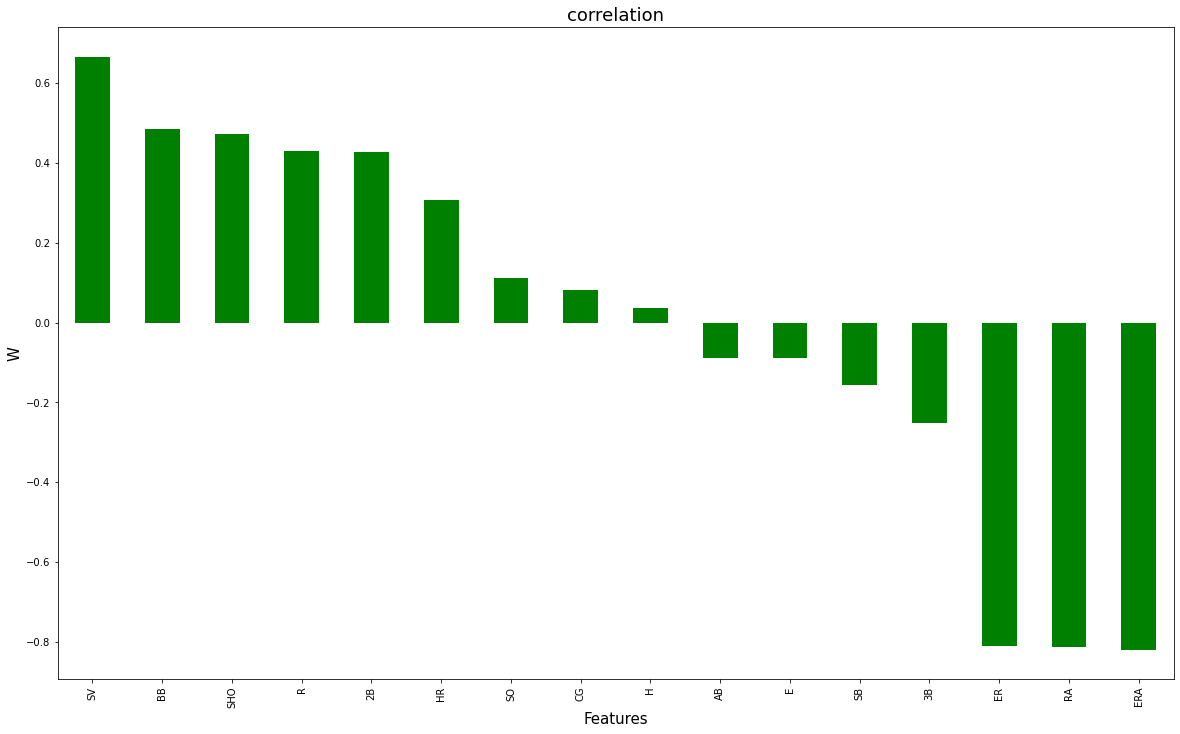

In [111]:
plt.figure(figsize = (20,12))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind='bar',color = 'g')
plt.xlabel('Features',fontsize=15)
plt.ylabel('W',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

**Findings:**
1. SV has the highest positive correlation with wins (W), followed by BB, SHO, R, 2B and HR, with low positive correlation of SO, CG and H with wins.
2. As detected earlier, ERA, RA and ER have a very high negative correlation with wins, followed by low negative correlation of wins with 3B, SB, E and AB.

In [112]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

**Assumption:** Taking the acceptable skewness range of 0.5 to -0.5, we need to normalise the skewness in R, H, CG, SV and E.

In [113]:
p_t = PowerTransformer(method='yeo-johnson', standardize=True)

In [114]:
skewed_df = ['CG','SV','E']

In [115]:
df1 = df[skewed_df].copy()

In [116]:
df1

,CG,SV,E
0,2,56,88
1,2,45,86
2,11,38,79
3,7,37,101
4,7,35,86
5,7,34,88
6,3,48,93
7,0,43,77
8,1,60,95
9,3,40,97


In [117]:
(df==0).sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     3
SHO    0
SV     0
E      0
dtype: int64

In [118]:
transformed = p_t.fit_transform(df1)

In [119]:
type(transformed)

numpy.ndarray

In [120]:
transformed = pd.DataFrame(transformed, columns=df1.columns)

In [121]:
transformed.skew()

CG   -0.059785
SV    0.000836
E     0.063909
dtype: float64

In [122]:
(transformed==0).sum()

CG    0
SV    0
E     0
dtype: int64

In [123]:
transformed.index = df.index

In [124]:
df[skewed_df] = transformed[skewed_df]

In [125]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.059785
SHO    0.565790
SV     0.000836
E      0.063909
dtype: float64

In [126]:
df2 =df.drop(columns = ['W'],axis=1).copy()

In [127]:
df2

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,-0.359844,8,1.546378,-0.334953
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,-0.359844,12,0.360444,-0.532211
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,1.993513,10,-0.607594,-1.342331
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,1.220103,9,-0.764453,0.678524
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,1.220103,12,-1.095010,-0.532211
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,1.220103,10,-1.269438,-0.334953
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,0.064630,4,0.718082,0.104539
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,-1.729889,10,0.104606,-1.614550
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,-0.909181,12,1.905480,0.261504
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,0.064630,10,-0.309109,0.409004


In [128]:
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)]

In [129]:
df3.shape

(29, 16)

In [130]:
df2.shape

(30, 16)

In [131]:
loss=(30-29)/30 * 100
loss

3.3333333333333335

In [132]:
drop_ind = df.index.difference(df3.index)

In [133]:
df.drop(drop_ind, inplace = True)

In [134]:
df.reset_index(drop=True, inplace = True)

In [135]:
df.shape

(29, 17)

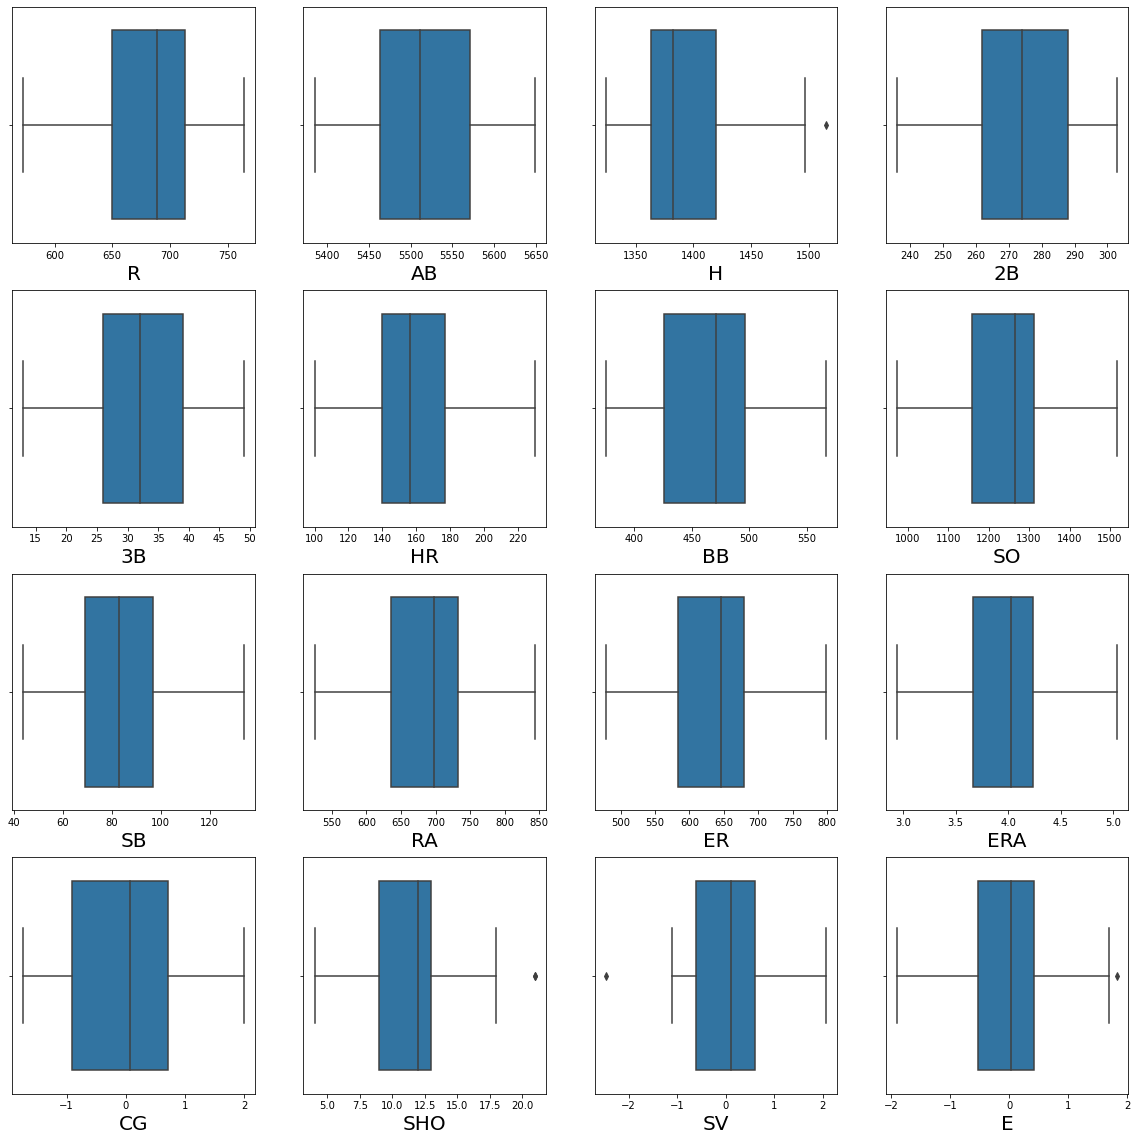

In [136]:
plt.figure(figsize=(20,20))
plotnum=1
for col in df.drop(columns = ['W'],axis=1):
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [137]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.002823
SHO    0.526943
SV    -0.062320
E      0.028601
dtype: float64

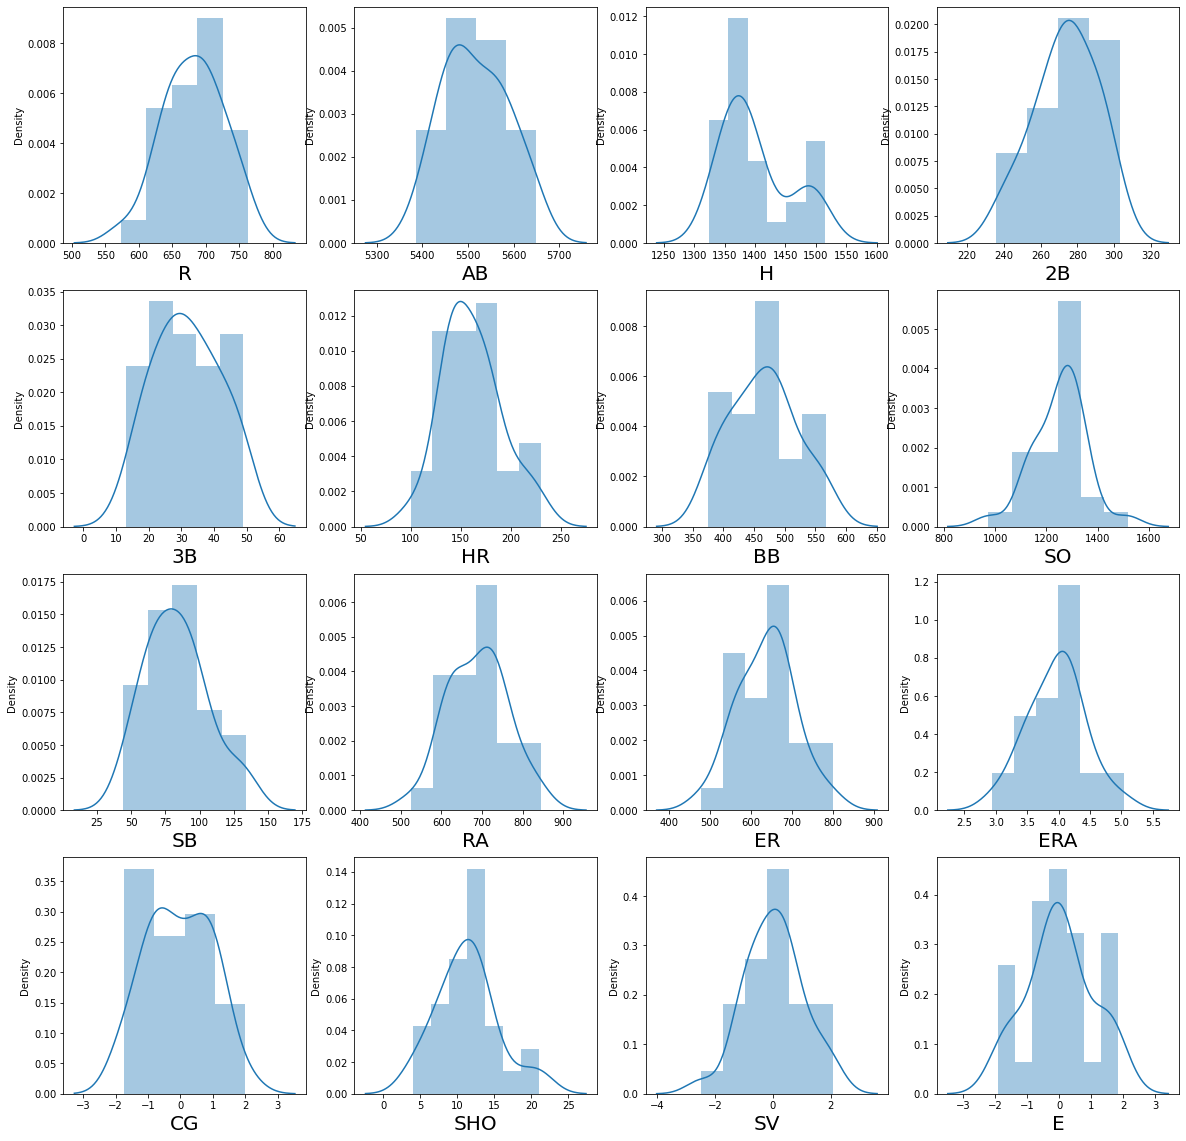

In [138]:
plt.figure(figsize=(20,20))
plotnum=1
for col in df.drop(columns=['W']):
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

**Data in features appears to have been normalised.**

## Feature Selection

In [139]:
X =df.drop(columns=['W'])
y =df['W']

In [140]:
scaler = StandardScaler()

In [141]:
scaled_X = scaler.fit_transform(X)

## Multicollinearity Check using VIF

In [142]:
vif = pd.DataFrame()

In [143]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [144]:
vif

,Features,vif
0,R,7.174829
1,AB,20.378798
2,H,10.144899
3,2B,3.620217
4,3B,3.369887
5,HR,8.798866
6,BB,3.461921
7,SO,2.899574
8,SB,1.982617
9,RA,202.858226


**Findings:**<br>
RA, ER and ERA present extremely high multicollinearity from among all the features.

## PCA

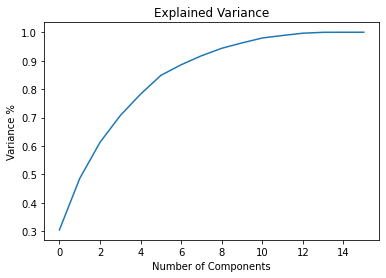

In [145]:
pca = PCA()
pr_comp = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

**Findings:** It is clearly evident from the PCA graph plotted above that around 95% of the variance is explained through 14 features.

In [146]:
pca = PCA(n_components=14)
new_comp = pca.fit_transform(scaled_X)
pr_x = pd.DataFrame(new_comp,columns=np.arange(14))

In [147]:
pr_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.091440,-2.909217,2.404900,-0.560762,-2.320603,-0.351599,0.799871,0.554914,0.667726,0.529308,0.628080,-0.252578,-0.131396,0.152488
1,0.038652,0.443265,0.310482,-0.042289,-0.301015,0.387909,-0.927418,1.401707,0.099485,0.162605,-0.717309,-0.274794,-0.034207,0.530852
2,-1.199592,-0.810260,0.147712,2.723998,-0.641751,-0.712339,1.484159,1.022611,0.100826,-1.186112,-0.366620,0.135022,0.053659,-0.112114
3,0.724887,1.462180,0.669983,0.742772,0.526531,-1.132788,-0.125041,-0.250787,0.383066,-0.642108,1.374324,0.179836,0.780127,0.271675
4,3.432166,-1.471635,-0.682928,1.691930,0.018170,0.219429,-1.129999,0.208290,-1.154166,-0.290284,0.102427,0.160115,0.113501,-0.318066
5,-0.351495,-0.356457,-2.826713,-1.200168,-1.681825,-1.040937,0.997587,-0.504992,-0.016178,0.267388,-0.603419,-0.029680,0.803323,0.028225
6,-0.839075,2.199116,-1.349187,-1.637952,-2.094101,1.435301,-1.254191,-0.639722,0.047942,-0.436072,-0.060739,0.181562,-0.037226,0.030656
7,-1.325717,0.065074,1.060814,-1.485585,0.191542,0.224372,0.025338,0.815302,-0.708541,0.314567,0.552547,-0.433928,-0.162305,-0.277984
8,2.157003,-2.053232,-0.909088,-0.027499,-1.100729,-1.183565,-0.472538,-0.834184,-0.216521,-0.059073,-0.335312,0.087423,-0.318599,0.013855
9,1.011210,-0.945635,-1.545736,-0.329141,0.409208,-0.907455,0.875233,0.493955,0.426173,1.230391,-0.073416,0.421666,-0.381693,0.078127


## Selecting best features

In [148]:
bf = SelectKBest(score_func = f_classif, k = 16)
fit = bf.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [149]:
fit = bf.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(22,'Score'))

   Feature     Score
15       E  4.446727
8       SB  3.283197
9       RA  2.524616
0        R  2.485509
11     ERA  1.732208
14      SV  1.687449
10      ER  1.636442
1       AB  1.622586
7       SO  1.519889
13     SHO  1.253358
6       BB  0.943327
5       HR  0.818974
4       3B  0.811129
3       2B  0.799063
2        H  0.729450
12      CG  0.431395


**Findings:**
1. Based on the vif, the column presenting highest multicollinearity, i.e. ER may be dropped. Also, since ERA computation includes ER as a component, the prediction will not lose out on the impact of ER.
2. Also, based on the scores of features obtained above, CG may be dropped.

In [150]:
best_X = X.drop(columns = ['ER','CG']).copy()

In [151]:
scal_x_best = scaler.fit_transform(best_X)

## Model Building

Since predicting the wins is not a classification problem, we are going to apply regression models for our prediction. Following are the models that are going to be used:

- Linear Regression
- Random Forest Regressor
- Support Vector Regression (SVR)
- Ridge Regression
- Lasso Regression

In [154]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scal_x_best,y,test_size = .20,random_state = i)
    modr =  Lasso()
    modr.fit(x_train,y_train)
    pred = modr.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9545056789421582 on random_state: 82


In [155]:
x_train,x_test,y_train,y_test = train_test_split(scal_x_best,y,test_size = .20, random_state =82)

In [156]:
lr = LinearRegression()
rf = RandomForestRegressor()
svr = SVR()
ridge = Ridge()
lasso = Lasso()

In [157]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
svr.fit(x_train,y_train)
ridge.fit(x_train,y_train)
lasso.fit(x_train,y_train)

Lasso()

In [158]:
print("-"*50)
print("Linear Regression Model")
print("-"*50)
lr_pred = lr.predict(x_test)
print("R2 Score: ", r2_score(y_test,lr_pred), "\n")
print("Mean Squared Error: ", mean_squared_error(y_test,lr_pred), "\n"*2)

print("-"*50)
print("Random Forest Model")
print("-"*50)
rf_pred = rf.predict(x_test)
print("R2 Score: ", r2_score(y_test,rf_pred), "\n")
print("Mean Squared Error: ", mean_squared_error(y_test,rf_pred), "\n"*2)

print("-"*50)
print("Support Vector Regression Model")
print("-"*50)
svr_pred = svr.predict(x_test)
print("R2 Score: ", r2_score(y_test,svr_pred), "\n")
print("Mean Squared Error: ", mean_squared_error(y_test,svr_pred), "\n"*2)

print("-"*50)
print("Ridge Model")
print("-"*50)
ridge_pred = ridge.predict(x_test)
print("R2 Score: ", r2_score(y_test,ridge_pred), "\n")
print("Mean Squared Error: ", mean_squared_error(y_test,ridge_pred), "\n"*2)

print("-"*50)
print("Lasso Model")
print("-"*50)
lasso_pred = lasso.predict(x_test)
print("R2 Score: ", r2_score(y_test,lasso_pred), "\n")
print("Mean Squared Error: ", mean_squared_error(y_test,lasso_pred), "\n"*2)

--------------------------------------------------
Linear Regression Model
--------------------------------------------------
R2 Score:  0.6376943202653454 

Mean Squared Error:  26.49863485392626 


--------------------------------------------------
Random Forest Model
--------------------------------------------------
R2 Score:  0.6175598176984429 

Mean Squared Error:  27.971249999999984 


--------------------------------------------------
Support Vector Regression Model
--------------------------------------------------
R2 Score:  0.05115707359920407 

Mean Squared Error:  69.39731736703598 


--------------------------------------------------
Ridge Model
--------------------------------------------------
R2 Score:  0.8391178255043079 

Mean Squared Error:  11.766743484643252 


--------------------------------------------------
Lasso Model
--------------------------------------------------
R2 Score:  0.9545056789421582 

Mean Squared Error:  3.3274040929249264 




## Model Cross Validation

In [160]:
print("Cross Validation Score for Linear Regression Model: ", cross_val_score(lr,scal_x_best,y,cv=5).mean(), "\n"*2)
print("Cross Validation Score for Random Forest Model: ", cross_val_score(rf,scal_x_best,y,cv=5).mean(), "\n"*2)
print("Cross Validation Score for Support Vector Regression Model: ", cross_val_score(svr,scal_x_best,y,cv=5).mean(), "\n"*2)
print("Cross Validation Score for Ridge Model: ", cross_val_score(ridge,scal_x_best,y,cv=5).mean(), "\n"*2)
print("Cross Validation Score for Lasso Model: ", cross_val_score(lasso,scal_x_best,y,cv=5).mean())

Cross Validation Score for Linear Regression Model:  -0.013921645625766654 


Cross Validation Score for Random Forest Model:  -0.5963154905127579 


Cross Validation Score for Support Vector Regression Model:  -0.29025410750993175 


Cross Validation Score for Ridge Model:  0.3747489018110233 


Cross Validation Score for Lasso Model:  0.5109352190713856


**Findings:**<br><br>
Based on the above computed `R2 scores` and the `Cross Validation Scores`, it is evident that **`Lasso`** Regression will give us the best model, while also presenting the lowest `Mean Squared Error`.

## Hyperparameter Tuning

In [161]:
parameter = {'alpha':np.array([5,0.5,0.05,0.005,0.0005,1,0.1,0.01,0.001,0.0001,0]),
             'fit_intercept': [True,False],
             'normalize':[True,False],
             'max_iter':[1000,2000,3000],
             'random_state':np.arange(100),
             'selection':["cyclic","random"]
            }

In [162]:
GridCV = GridSearchCV(Lasso(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [163]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 26400 candidates, totalling 132000 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([5.e+00, 5.e-01, 5.e-02, 5.e-03, 5.e-04, 1.e+00, 1.e-01, 1.e-02,
       1.e-03, 1.e-04, 0.e+00]),
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 2000, 3000],
                         'normalize': [True, False],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'selection': ['cyclic', 'random']},
             verbose=1)

In [164]:
GridCV.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'random_state': 42,
 'selection': 'random'}

In [165]:
best_mod = Lasso(alpha = 1.0, fit_intercept= True, normalize = False, max_iter = 1000, random_state = 42, selection ='random')

In [166]:
best_mod.fit(x_train,y_train)

Lasso(random_state=42, selection='random')

In [167]:
lasso_pred = best_mod.predict(x_test)
acc = r2_score(y_test,lasso_pred)
print(acc*100)

95.44917500131432


### `Our Lasso Regression model gives us an accuracy score of 95.4491%`

## Saving the best model

In [168]:
joblib.dump(best_mod,"baseballcasestudy_winspred.pkl")

['baseballcasestudy_winspred.pkl']

In [169]:
load_mod=joblib.load("baseballcasestudy_winspred.pkl")

In [171]:
print(load_mod.predict(x_test))

[64.68313529 79.92692702 78.17627888 90.37612193 72.1244262  85.69862061]


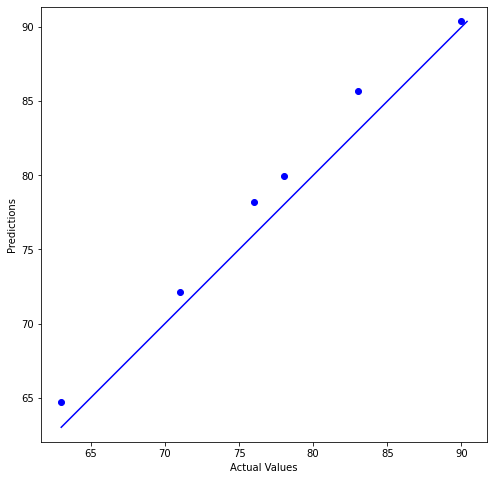

In [172]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, lasso_pred, c='blue')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(lasso_pred), max(y_test))
p2 = min(min(lasso_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=10)
plt.ylabel('Predictions', fontsize=10)
plt.axis('equal')
plt.show()

# `END`